<a href="https://colab.research.google.com/github/AdvaithUthaman/AdvaithUthaman/blob/main/world_population_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries which i'll be using
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Loading the data_set**

In [ ]:
data=pd.read_csv('/content/world_population (1).csv')
print(data.head())
data.isnull().sum()

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


**Droping the row **

In [ ]:
data.drop(['CCA3','Capital'],axis=1,inplace=True)
data.head()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# get number of rows and coloms

In [ ]:
print(f"Number of column :{data.shape[1]}\nNumber of rows :{data.shape[0]}")

Number of column :15
Number of rows :234


# **Summary of the data set**

In [ ]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "jet")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


# **To check which countries are the heigst in the population in the year 2022**

In [ ]:
continent_population = data.groupby("Continent")["2022 Population"].sum().reset_index()

x = continent_population[["Continent","2022 Population"]]
colors =px.colors.qualitative.Plotly
plt = px.bar(x, x="Continent", y="2022 Population",
             orientation='v',
             color_discrete_sequence = [colors[9]],
             title='Top 10 Continent with Highest Population Density(2022))',
             labels={'Density (per km²)': 'Population Density (per km²)'},
             template='plotly_dark')

plt.show()

In [ ]:
population2022=data.groupby(by='Continent')['2022 Population'].sum()
fig=px.pie(values=population2022.values,
          names=population2022.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Population by Continent in 2022',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [ ]:
plt = px.choropleth(data,
                    locations='Country/Territory',
                    locationmode='country names',
                    color='2022 Population',
                    hover_name='Country/Territory',
                    title = '2022 Population',
                    color_continuous_scale='spectral',
                    template='plotly_dark'
                    )
plt.show()

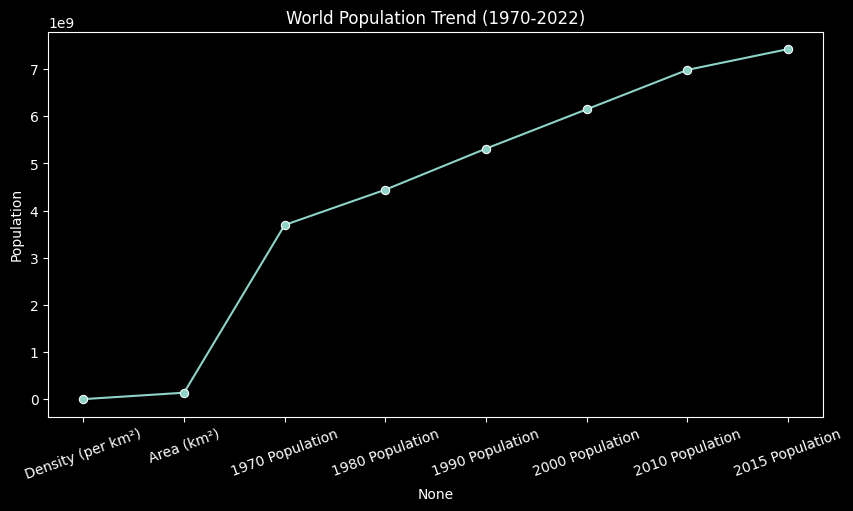

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
trend = data.iloc[:, 5:13].sum().sort_values(ascending=True)

sns.lineplot(x=trend.index, y=trend.values, marker="o", ax=ax)
plt.xticks(rotation=20)
plt.ylabel("Population")
plt.title("World Population Trend (1970-2022)")
plt.show()

# **Top 10 countries with the popualtion 2022**

In [ ]:
top_most_population = data.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(10)

fig=px.bar(x=top_most_population.index,
          y=top_most_population.values,
          color=top_most_population.index,
          color_discrete_sequence=px.colors.sequential.PuBuGn,
          text=top_most_population.values,
          title="Top 10 Countries with the most population 2022",
          template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

# **Top 10 least population 2022**

In [ ]:
top_least_population = data.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=True).head(10)

fig=px.bar(x=top_least_population.index,
          y=top_least_population.values,
          color=top_least_population.index,
          color_discrete_sequence=px.colors.sequential.PuBuGn,
          text=top_least_population.values,
          title="Top 10 Countries with the least population",
          template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

# **Yearly populayion changes**

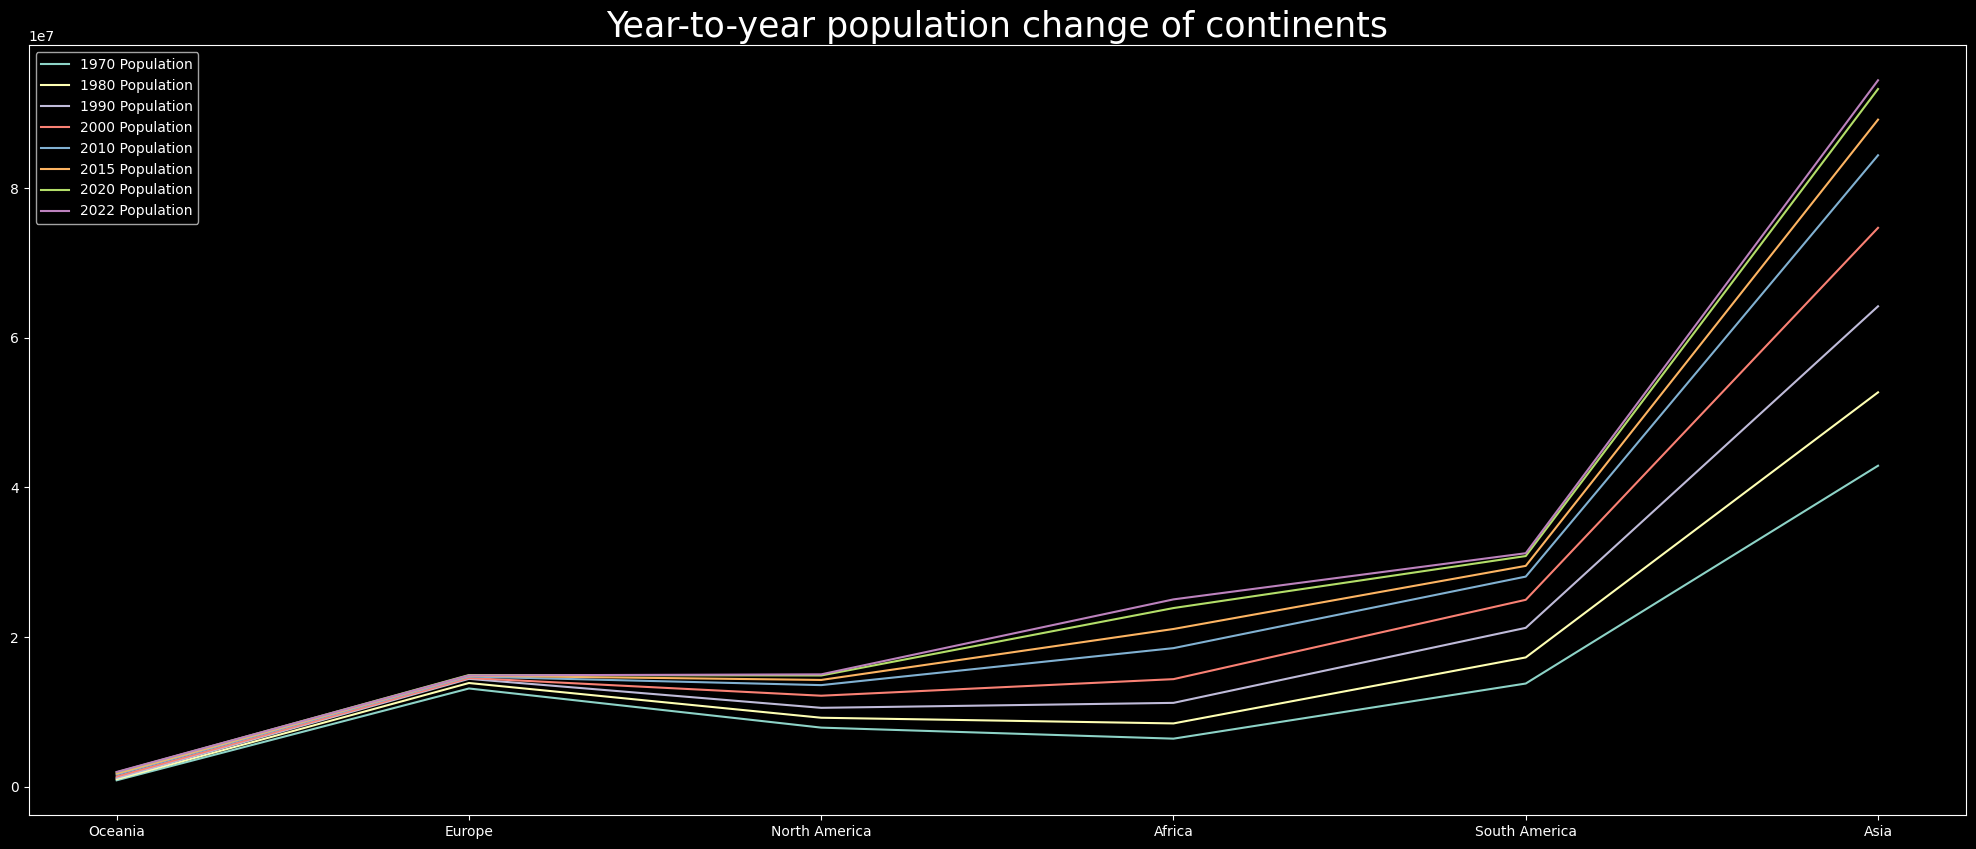

In [ ]:
features = data.select_dtypes(include=np.number).columns # Select only numeric columns
continent = data.groupby('Continent')[features].mean()
continent.sort_values(by='2022 Population', inplace=True)

population_features = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']

population_features.reverse()
plt.figure(figsize=(25,10))
for feature in population_features:
    plt.plot(continent[feature],label = feature)
plt.legend()
plt.title('Year-to-year population change of continents', size=25);
plt.show();

In [ ]:
X = data[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population']]
y = data['2022 Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

future_data = pd.DataFrame({
    '1970 Population': [data['1970 Population'].mean()],
    '1980 Population': [data['1980 Population'].mean()],
    '1990 Population': [data['1990 Population'].mean()],
    '2000 Population': [data['2000 Population'].mean()],
    '2010 Population': [data['2010 Population'].mean()],
    '2015 Population': [data['2015 Population'].mean()],
    '2020 Population': [data['2020 Population'].mean()]
})

predicted_population_2023 = model.predict(future_data)
print(f"Predicted Population for 2023: {predicted_population_2023[0]}")

Predicted Population for 2023: 34033522.35387201


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    name='2022 Population',
    x=['2022 Population'],
    y=india_data['2022 Population'],
    marker_color='blue',
    text=india_data['2022 Population'],
    textposition='auto'
))

fig.add_trace(go.Bar(
    name='2023 Prediction',
    x=['2023 Prediction'],
    y=india_data['2023 Prediction'],
    marker_color='green',
    text=india_data['2023 Prediction'],
    textposition='auto'
))

percentage_increase = india_data['Percentage Increase'].values[0]
fig.add_annotation(
    x=0.5,
    y=max(india_data['2022 Population'].values[0], india_data['2023 Prediction'].values[0]),
    text=f"Percentage Increase: {percentage_increase:.2f}%",
    showarrow=False,
    font=dict(size=14, color="white"),
    align="center",
    bgcolor="black",
    xref="paper", yref="y"
)

fig.update_layout(
    title='India Population Prediction (2023)',
    xaxis_title='Year',
    yaxis_title='Population',
    barmode='group',
    template='plotly_dark',
    legend_title='Legend'
)
fig.show()

population_2023 = india_data['2023 Prediction'].values[0]
print(f"Predicted Population for India in 2023: {population_2023}")
print(f"Percentage Increase for India from 2022: {percentage_increase:.2f}%")

Predicted Population for India in 2023: 1417486351.8664975
Percentage Increase for India from 2022: 0.02%
